## 가위바위보 분류기 만들기

### [ 주요 내용]

1. Exploration 내용 따라하기 (가위 바위 보 데이터 기준)
  - 데이터 준비 : (Train) 가위(100), 바위(100), 보(100) / (Test) 가위(100), 바위(100), 보(100)
  - 모델 적용 : Conv2D - MaxPooling - Conv2D - MaxPooling - Flatten
  - 학습 및 평가 : Accuracy 54%
  
2. 모델 개선
  - 데이터 수 추가 : Tensorflow의 ImageDataGenerator 모듈을 이용한 기존 이미지 부풀리기 --> 총 3,190개 파일 (Train 자료)
  - 모델 파라메터 변경 : Layer층 노드 증가 및 epoch 수 증가
  - 학습 및 평가 : Accuracy 74%

### (1) 데이터 준비

In [1]:
# 필요 모듈 불러오기
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import glob

In [2]:
# 파일마다 모두 28x28 사이즈로 바꾸어 저장.
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
   
    # print(len(images), " images to be resized.")

    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 이미지가 저장된 각 디렉토리 모든 jpg 파일에 적용
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images resized.
가위 이미지 resize 완료!
100  images resized.
바위 이미지 resize 완료!
100  images resized.
보 이미지 resize 완료!


In [3]:
# Train 데이터 읽어들임

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


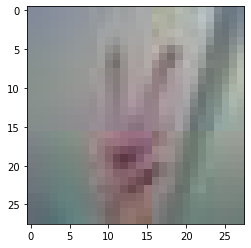

In [4]:
# train data 내용 sample 확인
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### (2) 딥러닝 네트워크 설계

In [5]:
# 모델 설계
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (No

### (3) 학습

In [6]:
# train data 전체 10번 반복학습

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 37ms/step - loss: 1.1149 - accuracy: 0.2867
Epoch 2/10
10/10 [==============================] - 0s 37ms/step - loss: 1.0934 - accuracy: 0.4967
Epoch 3/10
10/10 [==============================] - 0s 39ms/step - loss: 1.0817 - accuracy: 0.4433
Epoch 4/10
10/10 [==============================] - 0s 37ms/step - loss: 1.0659 - accuracy: 0.5067
Epoch 5/10
10/10 [==============================] - 0s 36ms/step - loss: 1.0356 - accuracy: 0.6500
Epoch 6/10
10/10 [==============================] - 0s 36ms/step - loss: 0.9830 - accuracy: 0.7100
Epoch 7/10
10/10 [==============================] - 0s 39ms/step - loss: 0.8950 - accuracy: 0.7367
Epoch 8/10
10/10 [==============================] - 0s 35ms/step - loss: 0.9078 - accuracy: 0.5833
Epoch 9/10
10/10 [==============================] - 0s 38ms/step - loss: 0.7728 - accuracy: 0.7600
Epoch 10/10
10/10 [==============================] - 0s 37ms/step - loss: 0.6846 - accuracy: 0.7933


### (4) 테스트(평가)

In [7]:
# 테스트 데이터 만들기 - resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images resized.
가위 이미지 resize 완료!
100  images resized.
바위 이미지 resize 완료!
100  images resized.
보 이미지 resize 완료!


In [8]:
# 테스트 데이터 불러오기

def load_test_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [9]:
# 테스트 데이터로 모델 평가

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.2426 - accuracy: 0.5400
test_loss: 1.242630958557129 
test_accuracy: 0.5400000214576721


### (5) 모델 개선하기

In [1]:
# 이미지 부풀리기는 https://pyimagesearch.com 블로거 참조
# 훈련데이터 데이터 부풀리기 위한 모듈 불러오기
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img


In [5]:
# 기존이미지로부터 생성할 이미지의 변형 및 반전 범위 지정

aug = ImageDataGenerator(
rotation_range=30,
zoom_range=0.2,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
horizontal_flip=True,
fill_mode="nearest")


In [15]:
# 기존 파일마다 10개의 변형 이미지 생성

def make_images(image_path, save_path):

    images=glob.glob(image_path + "/*.jpg")  

    for img in images:
        image = load_img(img)
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        imageGen = aug.flow(image, batch_size=1, save_to_dir=save_path,
        save_prefix="g", save_format="jpg")

        total = 0
        for image in imageGen:
            total += 1
            if total == 10:
                break
    
# 보 이미지가 저장된 각 디렉토리 모든 jpg 파일에 적용
image_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
save_path = os.getenv("HOME") + "/aiffel/LMS/paper"

make_images(image_path,save_path)

print("보 이미지 부풀리기 완료!")

# 바위 이미지가 저장된 각 디렉토리 모든 jpg 파일에 적용
image_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
save_path = os.getenv("HOME") + "/aiffel/LMS/rock"

make_images(image_path,save_path)

print("가위 이미지 부풀리기 완료!")

# 가위 이미지가 저장된 각 디렉토리 모든 jpg 파일에 적용
image_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
save_path = os.getenv("HOME") + "/aiffel/LMS/scissor"

make_images(image_path,save_path)

print("가위 이미지 부풀리기 완료!")

가위 이미지 부풀리기 완료!


In [24]:
# 추가된 훈련데이터로 학습진행: 하이퍼파라미터 변경, epoch수 증가 포함

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
   
    # print(len(images), " images to be resized.")

    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 이미지가 저장된 각 디렉토리 모든 jpg 파일에 적용
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")


1068  images resized.
가위 이미지 resize 완료!
1062  images resized.
바위 이미지 resize 완료!
1060  images resized.
보 이미지 resize 완료!


In [25]:
# Train 데이터 읽어들임

def load_data(img_path, number_of_data=3190):  # 가위바위보 이미지 개수 총합
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3190 입니다.
x_train shape: (3190, 28, 28, 3)
y_train shape: (3190,)


In [26]:
# 모델 설계 : 32-64-128 개로 조정

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (

In [27]:
# train data 전체 20번 반복학습: epochs 수 증가

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=20)

Epoch 1/20
100/100 [==============================] - 4s 39ms/step - loss: 1.0761 - accuracy: 0.3856
Epoch 2/20
100/100 [==============================] - 4s 39ms/step - loss: 0.9396 - accuracy: 0.5542
Epoch 3/20
100/100 [==============================] - 4s 39ms/step - loss: 0.8205 - accuracy: 0.6420
Epoch 4/20
100/100 [==============================] - 4s 39ms/step - loss: 0.6950 - accuracy: 0.6997
Epoch 5/20
100/100 [==============================] - 4s 39ms/step - loss: 0.6090 - accuracy: 0.7480
Epoch 6/20
100/100 [==============================] - 4s 39ms/step - loss: 0.5392 - accuracy: 0.7906
Epoch 7/20
100/100 [==============================] - 4s 39ms/step - loss: 0.4557 - accuracy: 0.8141
Epoch 8/20
100/100 [==============================] - 4s 39ms/step - loss: 0.3712 - accuracy: 0.8596
Epoch 9/20
100/100 [==============================] - 4s 40ms/step - loss: 0.3232 - accuracy: 0.8768
Epoch 10/20
100/100 [==============================] - 4s 39ms/step - loss: 0.2706 - accura

In [28]:
# 테스트 데이터 만들기 - resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images resized.
가위 이미지 resize 완료!
100  images resized.
바위 이미지 resize 완료!
100  images resized.
보 이미지 resize 완료!


In [29]:
# 테스트 데이터 불러오기

def load_test_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [30]:
# 테스트 데이터로 모델 평가

test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.9534 - accuracy: 0.7467
test_loss: 0.9533736109733582 
test_accuracy: 0.746666669845581


## [ 회 고 ]

 - 훈련 데이터 대비 테스트 데이터 생성 배경이 다를 경우 범용적인 적용이 쉽지 않음을 알 수 있었음
 - 훈련 데이터 확보의 한가지 방법으로 Tensorflow가 제공하는 ImageDataGenerator 모듈 활용은 좋은 경험이었음
 - 심층 신경망 모델형성은 일종의 요리를 하는 것 같다는 생각이 들었음
    - 좋은 재료를 마련해야 하고, 어떤 도구로 조리 순서의 조합을 어떻게 해야 좋은 음식이 나오는지의 recipe를 마련하는 작업
    - 성과가 입증된 모델은 널리 사용될 수 있다(transfer learning)
 - 이미지와 파일을 다루는 기법을 좀 더 알아야 할 것 같음